<a href="https://colab.research.google.com/github/Dedalus1982/MIPHI-ML-masters/blob/main/%D0%9B%D0%B8%D0%BD%D0%B0%D0%BB_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Создание данных в виде словаря
data = {
    'Комнаты': [3, 1, 2, 3, 1, 3, 2, 1, 3, 1, 2],
    'Площадь': [51, 30, 45, 55, 45, 100, 71, 31, 53, 33, 43],
    'Этаж': [3, 1, 2, 1, 3, 3, 2, 2, 5, 3, 5],
    'Центр?': [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    'Спальный1?': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    'Спальный 2?': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    'Цена': [2200, 1600, 1900, 2000, 4500, 7000, 5000, 1700, 2100, 1500, 2000]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Вывод DataFrame - проверка
print('Входные данные в виде DataFrame')
print(df)

Входные данные в виде DataFrame
    Комнаты  Площадь  Этаж  Центр?  Спальный1?  Спальный 2?  Цена
0         3       51     3       0           1            0  2200
1         1       30     1       0           1            0  1600
2         2       45     2       0           1            0  1900
3         3       55     1       0           1            0  2000
4         1       45     3       1           0            0  4500
5         3      100     3       1           0            0  7000
6         2       71     2       1           0            0  5000
7         1       31     2       0           0            1  1700
8         3       53     5       0           0            1  2100
9         1       33     3       0           0            1  1500
10        2       43     5       0           0            1  2000


# Задание 1
###Разминка. Умножение матриц
При работе с большими данными необходимо учитывать оптимальность выполнения расчётов.

Из теории к этому модулю вы уже познакомились с умножением матриц. Но знали ли вы, что эта операция ассоциативна? Иными словами, для любых трёх матриц  произведение  будет одинаковым независимо от порядка выполнения умножений (не перепутайте порядок аргументов —  не всегда равно ).

Для выполнения этого задания определите, в каком порядке эффективнее умножить три матрицы. Например, у нас есть матрицы A = [[1, 2]], B=[[2], [1]], C=[[5]]. Эффективнее сначала умножить  (два умножения), а потом умножить результат на  (одно умножение). В этом случае мы выполним три умножения.

Если же мы будем умножать сначала  на  (два умножения), а потом результат умножим слева на  (два умножения), то в сумме будет четыре умножения.

* Входные данные: матрицы  в виде numpy-массивов. Гарантируется, что их можно перемножить в порядке AxBxC.
* Результат: напишите функцию multiplication_order(A, B, C), которая вернёт строку "(AxB)xC", если количество умножений элементов матриц при умножении  меньше либо равно количеству умножений, если выполнять их в порядке . В противном случае верните строку "Ax(BxC)".

* Пример входных данных: A = [[1, 2]], B=[[2], [1]], C=[[5]]

* Пример результата: “(AxB)xC”.

In [ ]:
def multiplication_order(A, B, C):
    A_raw, A_col = A.shape
    B_raw, B_col = B.shape
    C_raw, C_col = C.shape

    # Проверка размеров
    if A_col != B_raw:
        raise ValueError("Матрицы A и B не могут быть перемножены")
    if B_col != C_raw:
        raise ValueError("Матрицы B и C не могут быть перемножены")

    # Кол-во опер. (A x B) x C: A_raw * A_col * B_col + A_raw * B_col * C_col
    # Кол-во опер. A x (B x C): B_raw * C_col * B_col + A_raw * B_col * C_col
    # Сравниваем количество операций
    if A_raw * A_col <= B_raw * C_col:
        return print("(AxB)xC")
    else:
        return print("Ax(BxC)")

# Ввод матриц
A = np.array([[1, 2]])
B = np.array([[2], [1]])
C = np.array([[5]])

# Запускаем функцию
multiplication_order(A, B, C)

(AxB)xC


# Задание 2
В этой задаче вам потребуется найти признак, наиболее сильно коррелирующий с результатом, и найти самый «слабый» признак.

* Входные данные: матрица признаков  в виде numpy-массива и вектор цен . Количество строк в матрице  совпадает с количеством элементов в векторе . Каждая строка матрицы описывает признаки одной квартиры, а соответствующий элемент в  равен цене квартиры.

* Результат: напишите функцию best_worst(X, Y), которая вернёт два числа: max_corr_idx (номер признака, наиболее коррелирующего с ценой) и min_corr_idx (номер признака, наименее коррелирующего с ценой). Учитывайте, что корреляция имеет знак, а сила корреляции зависит от абсолютного значения — нужно вернуть наибольший и наименьший признаки по абсолютному значению.

* Подсказка: можно использовать функцию numpy.corrcoef для быстрого вычисления коэффициентов корреляции.

* Пример входных данных: см. таблицу из предисловия к проекту.

* Пример результата: функция должна вернуть кортеж (3, 2). 3 — номер (начиная с 0) столбца Центр?, цена больше всего зависит от того, находится ли квартира в центре. 2 — номер столбца Этаж. В этом примере от номера этажа цена практически не зависит.


Матрица признаков:
[[  3  51   3   0   1   0]
 [  1  30   1   0   1   0]
 [  2  45   2   0   1   0]
 [  3  55   1   0   1   0]
 [  1  45   3   1   0   0]
 [  3 100   3   1   0   0]
 [  2  71   2   1   0   0]
 [  1  31   2   0   0   1]
 [  3  53   5   0   0   1]
 [  1  33   3   0   0   1]
 [  2  43   5   0   0   1]]
Вектор для цен:
[2200 1600 1900 2000 4500 7000 5000 1700 2100 1500 2000]

Результат: кортеж, первое число - столбец с наиб.корреляцией с ценой, второе число - столбец с наим. корреляцией с ценой: (3, 2)


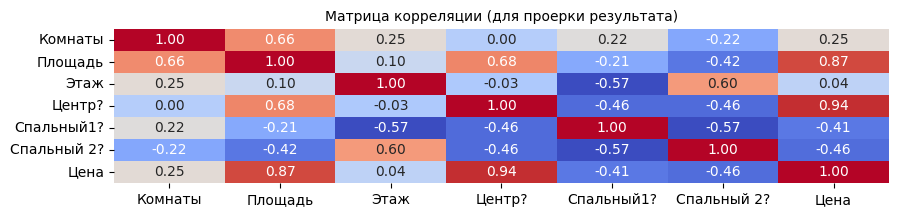

In [ ]:
# Дано
X = df[['Комнаты', 'Площадь', 'Этаж', 'Центр?', 'Спальный1?', 'Спальный 2?']].to_numpy() # Матрица признаков
Y = df['Цена'].to_numpy() # Вектор для цен

# Решение
def best_worst(X, Y):
    data = np.vstack([X.T, Y])  # Транспонируем X и добавляем строку Y
    corr_matrix = np.corrcoef(data, rowvar=True)  # Вычисляем матрицу корреляции
    price_corr = corr_matrix[-1][:-1]  # Корреляции между признаками (последняя строка) и ценой (последний столбец)
    max_corr_idx = np.argmax(np.abs(price_corr))  # Индекс максимальной корреляции
    min_corr_idx = np.argmin(np.abs(price_corr))  # Индекс минимальной корреляции
    return (max_corr_idx, min_corr_idx)

# Визуализируем матрицу корреляции
plt.figure(figsize=(10, 2))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=False, cbar=False, xticklabels=df.columns, yticklabels=df.columns)
plt.title('Матрица корреляции (для проерки результата)', fontsize=10)

# Вывод NumPy массива и вектора цен (проверка)
print("Матрица признаков:")
print(X)
print("Вектор для цен:")
print(Y)
print()
print(f'Результат: кортеж, первое число - столбец с наиб.корреляцией с ценой, второе число - столбец с наим. корреляцией с ценой: {best_worst(X, Y)}')
plt.show()

#Задание 3
* Входные данные: матрица признаков  в виде numpy-массива.

* Результат: напишите функцию corr_rank(X), возвращающую одно число — ранг корреляционной матрицы.

* Подсказка: можно использовать функцию np.linalg.matrix_rank.

* Пример входных данных: см. таблицу из предисловия к проекту.

* Пример результата: 5


In [ ]:
def corr_rank(X):
    return np.linalg.matrix_rank(np.corrcoef(X, rowvar=False))

print(f'Ранг корреляционной матрицы: {corr_rank(X)}')

Ранг корреляционной матрицы: 5


# Задание 4
* Входные данные: матрица  в виде numpy-массива.

* Результат: напишите функцию inverse_matrix(A), которая вернёт None, если матрица необратима (то есть её определитель по абсолютному значению меньше 0.001, либо вернёт обратную матрицу в виде numpy-массива. Подсказка: используйте np.linalg.inv.

* Пример входных данных: A = np.array([[1, 2], [2, 1]])

* Пример результата: array([[-0.33333333, 0.66666667],[ 0.66666667, -0.33333333]])

In [ ]:
def inverse_matrix(A):
    det = np.linalg.det(A)
    if abs(det) < 0.001:  # Проверяем определитьель (обратимость)
        return None
    return np.linalg.inv(A)

# На данных из примера
A = np.array([[1, 2], [2, 1]])
print(inverse_matrix(A))


[[-0.33333333  0.66666667]
 [ 0.66666667 -0.33333333]]


# Задание 5
* Входные данные: матрица признаков  в виде numpy-массива и вектор цен  в виде numpy-массива.  имеет форму (m, n) —  строк, по строке на каждую квартиру,  признаков для каждой квартиры.  имеет форму (m), это вектор из  элементов — цены всех  квартир.

* Результат: напишите функцию fit_model(X, y), которая вернёт numpy-массив с оптимальными коэффициентами , найденными методом OLS.

* Пример входных данных: см. таблицу из предисловия к проекту.

* Пример результата: [-574.12295766 65.33255763 141.80223878 1566.16246224 12.32450391 -315.34552489]

In [ ]:
def fit_model(X, y):
    a = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y) # Вычисляем коэффициенты OLS, используем псевдообратную матрицу
    return a

print(fit_model(X, Y))

[-574.12295766   65.33255763  141.80223878 1566.16246224   12.32450391
 -315.34552489]
